# RISCA

## Dependencies

In [1]:
# %pip install numpy matplotlib seaborn pandas ipywidgets openpyxl
# !git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
%cd script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe

h:\myjupyter\SAR_ADC\script


## Set Parameters

In [2]:
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = input("sar/tisar/nssar1o1c/nssar1o1ccp/pipesar2s")
config_file_path = os.path.join("..\config",pr['conf_name'])

pr_loaded = load_assembler_xlsx(config_file_path)

# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded successfully!\n")
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loaded successfully!



,Frame1,Frame2,Frame3
CB,,,
CB1,OUT RST SAM1,MSB,AMP1
CB2,MSB,LSB,OUT RST SAM0 F1P0
CB3,EMPTY,EMPTY,EMPTY
CB4,EMPTY,EMPTY,EMPTY
CB5,EMPTY,EMPTY,EMPTY
CB6,EMPTY,EMPTY,EMPTY


## Run Simulator

12.047509059070464 74.28600453560419 86.57770073980771 75.34707356637372 -80.92614945121993 -0.5489452872409052 75.89601885361463 Axes(0.125,0.11;0.775x0.77)


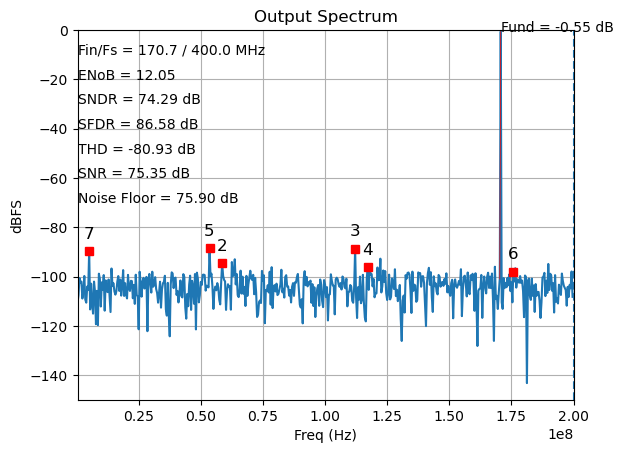

In [4]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr,mdl)
test.mode_analyser()